In [2]:
# 필수 라이브러리와 그래프 스타일 설정
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score

sns.set_theme(style="whitegrid", palette="crest")
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [3]:
# 1) 학습 데이터 파일 불러오기와 크기 확인
DATA_PATH = Path("../data/training/final/travel_ml.csv")

travel = pd.read_csv(DATA_PATH)

row_count, column_count = travel.shape
print(f"행(row) 수: {row_count}")
print(f"열(column) 수: {column_count}")

행(row) 수: 5103
열(column) 수: 120


In [4]:
# IS_FAILED_TRIP 비율 출력
travel['IS_FAILED_TRIP'].value_counts(normalize=True)

IS_FAILED_TRIP
0.0    0.710954
1.0    0.289046
Name: proportion, dtype: float64

In [7]:
BINARY_CLASSIFICATION_FEATURES = [
    'IS_FAILED_TRIP',
    'TRAVEL_STATUS_ACCOMPANY_CODE',
    'MVMN_NM_CODE',
    'GENDER_CODE',
    'TRAVEL_STATUS_RESIDENCE_CODE',
    'TRAVEL_STATUS_DESTINATION_CODE',
    'TRAVEL_PURPOSE_CD_1',
    'TRAVEL_PURPOSE_CD_2',
    'TRAVEL_PURPOSE_CD_3',
    'TRAVEL_PURPOSE_CD_4',
    'TRAVEL_PURPOSE_CD_5',
    'TRAVEL_PURPOSE_CD_6',
    'TRAVEL_PURPOSE_CD_7',
    'TRAVEL_PURPOSE_CD_8',
    'TRAVEL_PURPOSE_CD_9',
    'TRAVEL_PURPOSE_CD_10',
    'TRAVEL_PURPOSE_CD_11',
    'TRAVEL_PURPOSE_CD_12',
    'TRAVEL_PURPOSE_CD_13',
    'TRAVEL_PURPOSE_CD_21',
    'TRAVEL_PURPOSE_CD_22',
    'TRAVEL_PURPOSE_CD_23',
    'TRAVEL_PURPOSE_CD_24',
    'TRAVEL_PURPOSE_CD_25',
    'TRAVEL_PURPOSE_CD_26',
    'TRAVEL_PURPOSE_CD_27',
    'TRAVEL_PURPOSE_CD_28',
    'TRAVEL_MISSION_CHECK_CD_1',
    'TRAVEL_MISSION_CHECK_CD_2',
    'TRAVEL_MISSION_CHECK_CD_3',
    'TRAVEL_MISSION_CHECK_CD_4',
    'TRAVEL_MISSION_CHECK_CD_5',
    'TRAVEL_MISSION_CHECK_CD_6',
    'TRAVEL_MISSION_CHECK_CD_7',
    'TRAVEL_MISSION_CHECK_CD_8',
    'TRAVEL_MISSION_CHECK_CD_9',
    'TRAVEL_MISSION_CHECK_CD_10',
    'TRAVEL_MISSION_CHECK_CD_11',
    'TRAVEL_MISSION_CHECK_CD_12',
    'TRAVEL_MISSION_CHECK_CD_13',
    'TRAVEL_MISSION_CHECK_CD_21',
    'TRAVEL_MISSION_CHECK_CD_22',
    'TRAVEL_MISSION_CHECK_CD_23',
    'TRAVEL_MISSION_CHECK_CD_24',
    'TRAVEL_MISSION_CHECK_CD_25',
    'TRAVEL_MISSION_CHECK_CD_26',
    'TRAVEL_MISSION_CHECK_CD_27',
    'TRAVEL_MISSION_CHECK_CD_28',
    'TRAVEL_START_YEAR',
    'TRAVEL_START_MONTH',
    'TRAVEL_END_YEAR',
    'TRAVEL_END_MONTH',
    'activity_payment_sum_SCALED',
    'activity_payment_count_SCALED',
    'activity_store_count_SCALED',
    'activity_history_rows_SCALED',
    'activity_type_unique_SCALED',
    'lodging_payment_sum_SCALED',
    'lodging_payment_count_SCALED',
    'lodging_store_count_SCALED',
    'visit_trip_days_SCALED',
    'visit_move_cnt_SCALED',
    'AGE_GRP_SCALED',
    'FAMILY_MEMB_SCALED',
    'INCOME_SCALED',
    'HOUSE_INCOME_SCALED',
    'TRAVEL_TERM_SCALED',
    'TRAVEL_NUM_SCALED',
    'TRAVEL_COMPANIONS_NUM_SCALED',
    'activity_per_day_SCALED',
    'spending_per_day_SCALED',
    'activity_to_lodging_ratio_SCALED',
    'companions_per_family_SCALED'
]
BINARY_CLASSIFICATION_TARGET = 'IS_FAILED_TRIP'

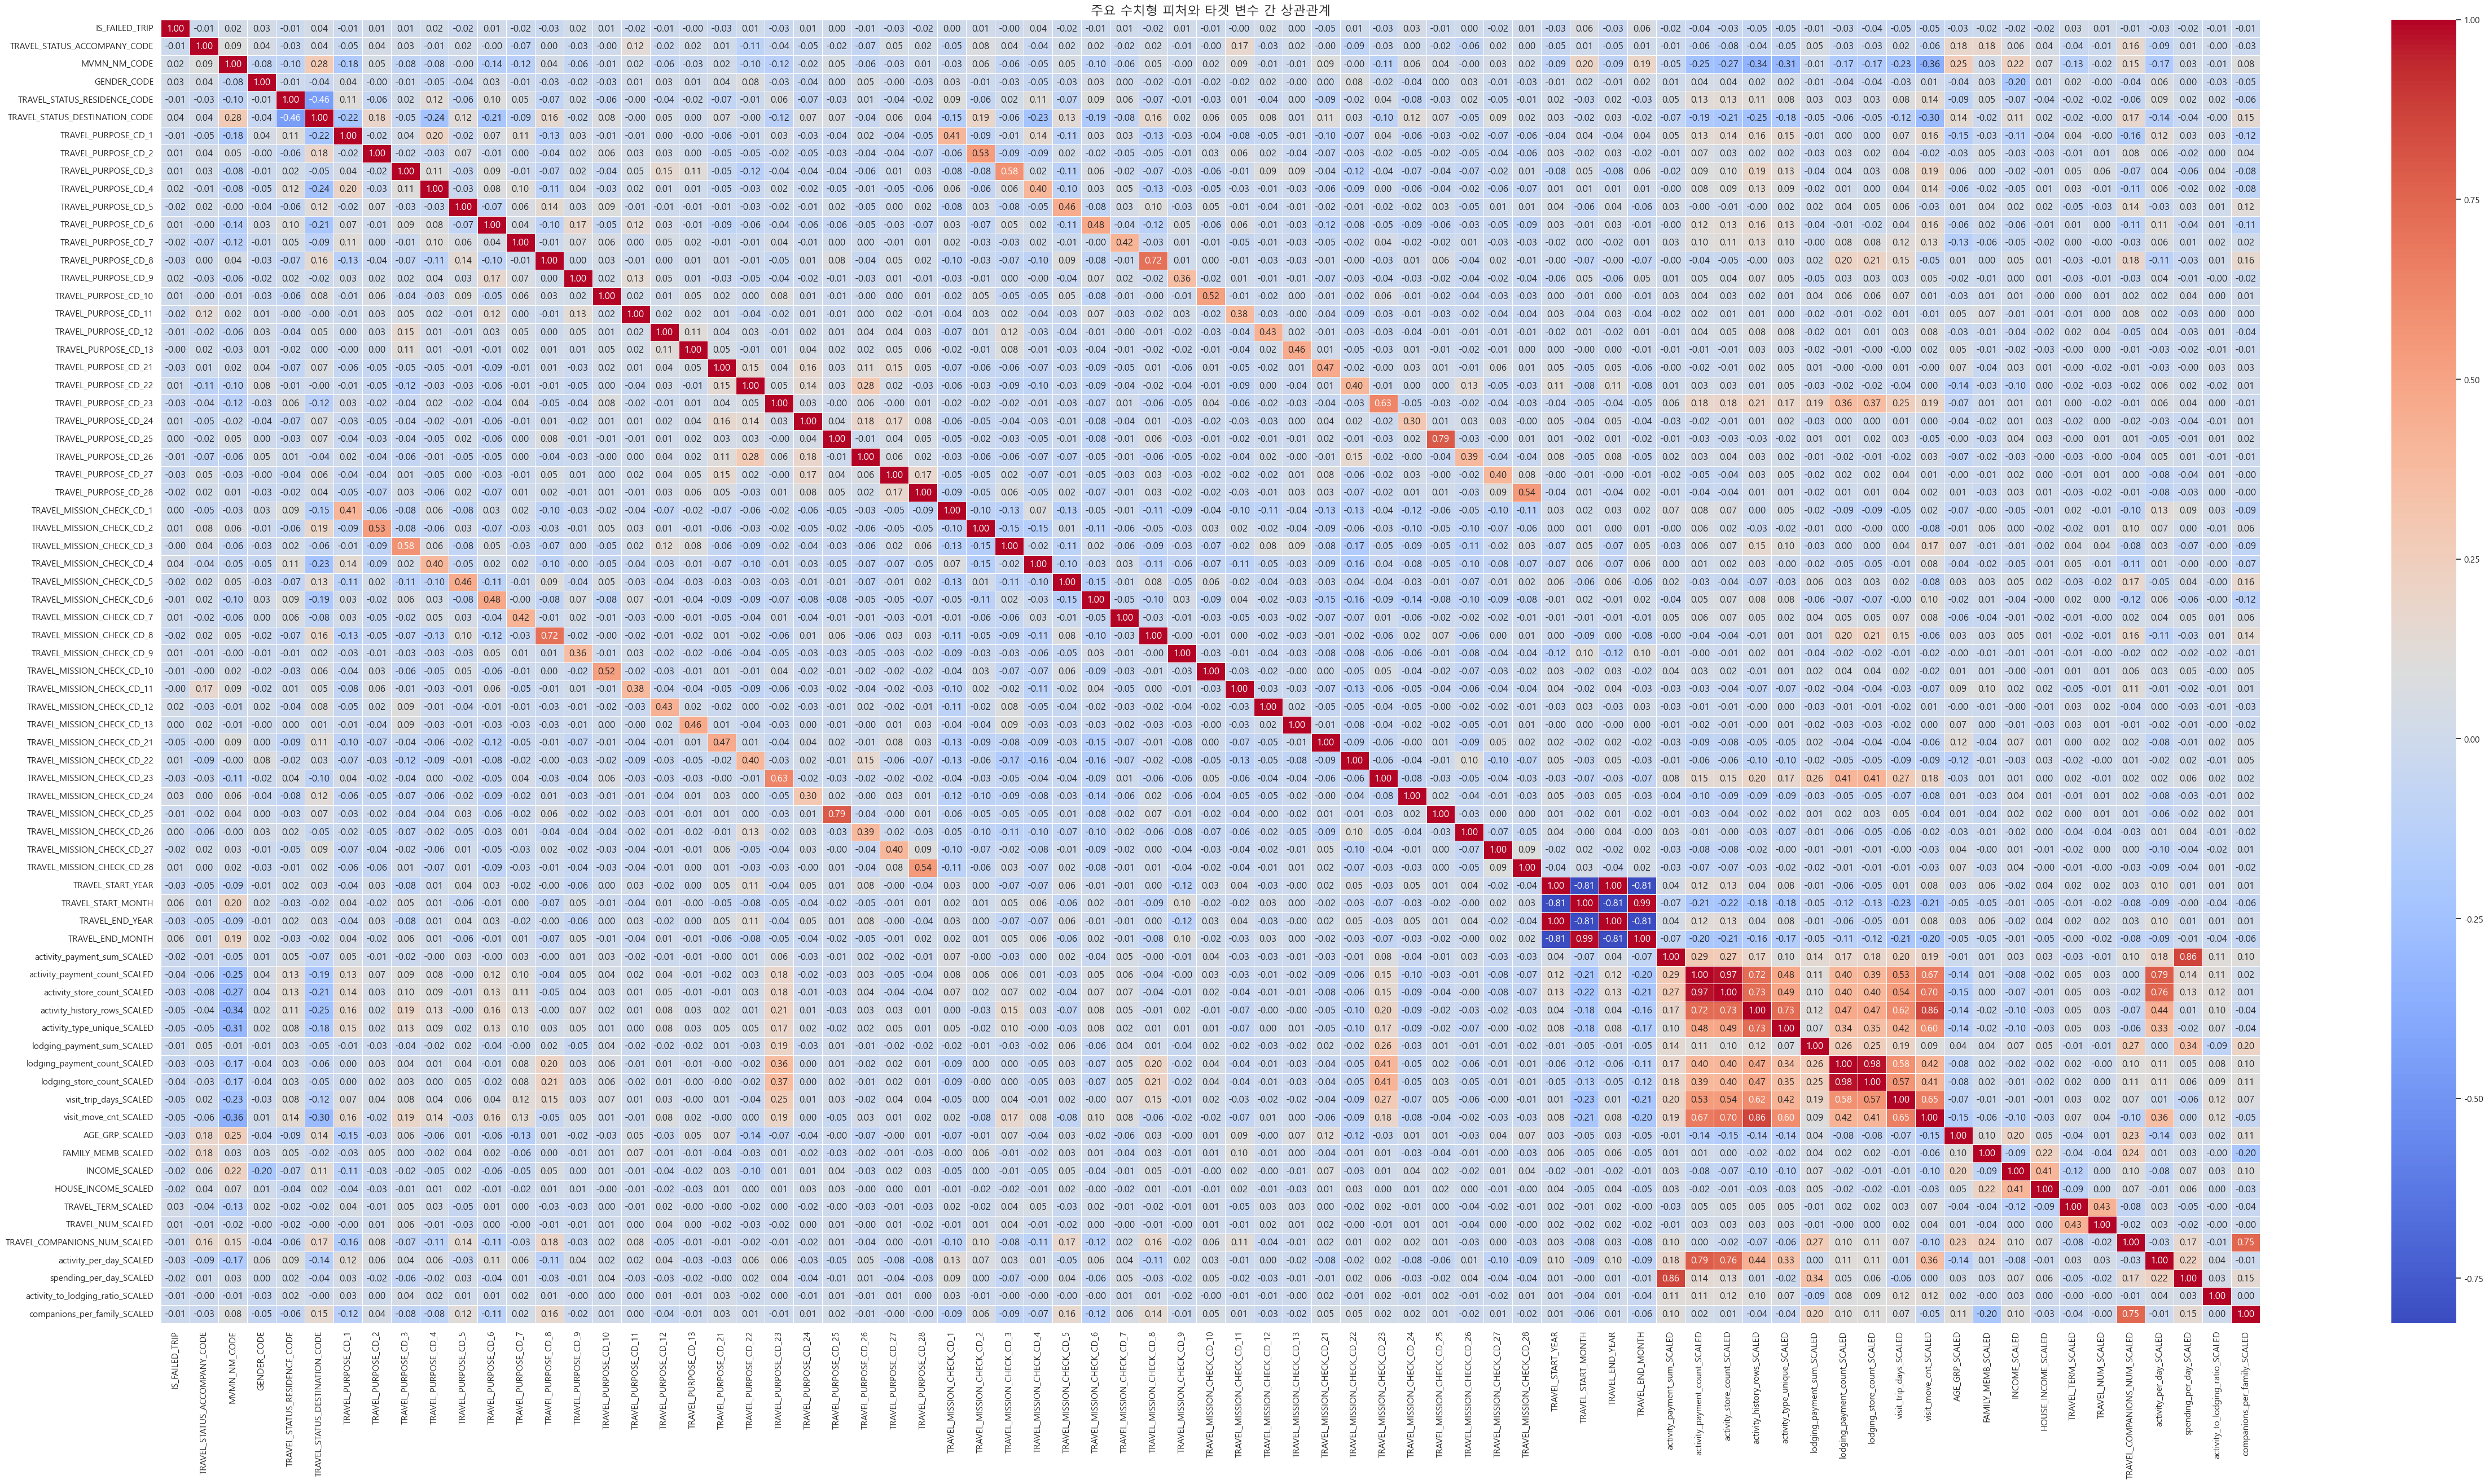

In [8]:
# 선택된 피처들 중 travel 데이터프레임에 실제 존재하는 것만 필터링
corr_matrix = travel[BINARY_CLASSIFICATION_FEATURES].corr()

plt.figure(figsize=(60, 30))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('주요 수치형 피처와 타겟 변수 간 상관관계', fontsize=16)
plt.show()